<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area.


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


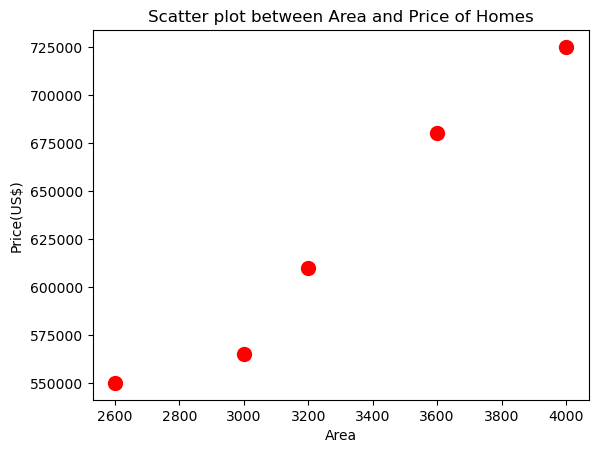

In [9]:
# Create a scatter plot
plt.scatter(df.area,df.price,s =100,color = "red")
plt.title("Scatter plot between Area and Price of Homes")
plt.xlabel("Area")
plt.ylabel("Price(US$)")
plt.show()


In [15]:
reg = linear_model.LinearRegression()
reg.fit(df[["area"]],df.price)


LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [47]:
reg.predict(pd.DataFrame({"area":[3300]}))

array([628715.75342466])

In [20]:
reg.coef_

array([135.78767123])

In [21]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [22]:
180616.43835616432+3300*135.78767123

628715.7534151643

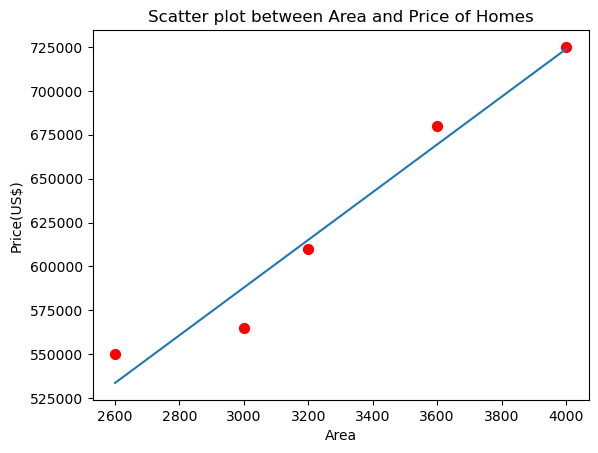

In [31]:
## Add a line for the predicted values
plt.scatter(df.area,df.price,s =50,color = "red")
plt.title("Scatter plot between Area and Price of Homes")
plt.plot(df.area,reg.predict(df[["area"]]))
plt.xlabel("Area")
plt.ylabel("Price(US$)")
plt.show()

In [ ]:
d = pd.read_csv("areas.csv",index =False)
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [27]:
p = reg.predict(d)

In [28]:
d["prices"] = p
d.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


<h3 style="color:red">Generate CSV file with list of home price predictions</h3>

In [ ]:
#d.to_csv("prediction.csv")

## Exercise

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

In [35]:
E_data = pd.read_csv(r"C:\Users\rdank\OneDrive\Desktop\Self Taught\Git\Codebasics\Machine Learning\1_linear_reg\Exercise\canada_per_capita_income.csv")
E_data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [36]:
# rename the column per capita income (US$) as per_capita
E_data = E_data.rename(columns={"per capita income (US$)": "per_capita"})
E_data.head()

,year,per_capita
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


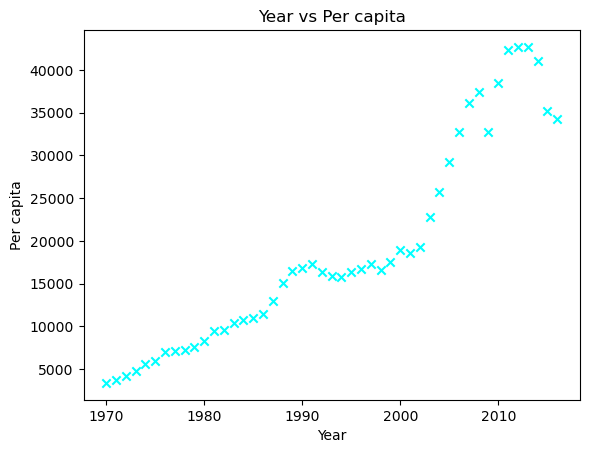

In [41]:
plt.scatter(E_data.year,E_data.per_capita, marker="x",color ="cyan")
plt.xlabel("Year")
plt.ylabel("Per capita")
plt.title("Year vs Per capita")
plt.show()

In [46]:
E_reg = linear_model.LinearRegression()
E_reg.fit(E_data[["year"]],E_data.per_capita)
E_reg.predict(pd.DataFrame({"year":[2020]}))

array([41288.69409442])

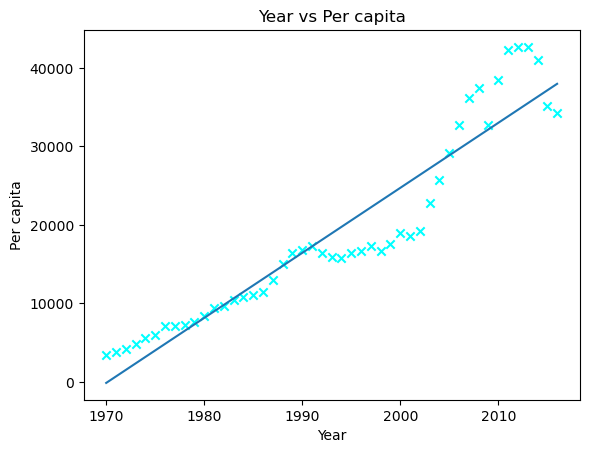

In [45]:
plt.scatter(E_data.year,E_data.per_capita, marker="x",color ="cyan")
plt.plot(E_data.year,E_reg.predict(E_data[["year"]]))
plt.xlabel("Year")
plt.ylabel("Per capita")
plt.title("Year vs Per capita")
plt.show()